<a href="https://colab.research.google.com/github/mohanveeramanikantak/FMML/blob/main/FMML_Module_2_project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Project

```
Coordinator: Aswin Jose
```

---

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

we wil be performing a simple Exploratory Data Anaysis for this project. We will use the methods we learned in the tutorials to have a basic understanding of the dataset. So first we will start with the heart dataset available from kaggle. the infomration about the columns of the dataset is given below:    
-age    
-sex    
-chest pain type (4 values)    
-resting blood pressure    
-serum cholestoral in mg/dl    
-fasting blood sugar > 120 mg/dl    
-resting electrocardiographic results (values 0,1,2)    
-maximum heart rate achieved    
-exercise induced angina   
-oldpeak = ST depression induced by exercise relative to rest    
-the slope of the peak exercise ST segment    
-number of major vessels (0-3) colored by flourosopy    
-:thal: 0 = normal; 1 = fixed defect; 2 = reversable defect    

Fill in the portions that says "to do"

In [2]:
from google.colab import files
uploaded1 = files.upload()

Saving heart.csv to heart.csv


In [3]:
data = pd.read_csv("heart.csv")
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [4]:
data.shape

(303, 14)

In [5]:
data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Data preparation

In [6]:
## we will be comparing rest of the parameters/columns present in the data with respect to precence or absece of heart disease
data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({1: "typical_angina",
                          2: "atypical_angina",
                          3:"non-anginal pain",
                          4: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.cp.replace({1: "upsloping",
                          2: "flat",
                          3:"downsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [7]:
data.head()

age     sex                cp  trestbps  chol  fbs  restecg  thalach exang  \
0   63    Male  non-anginal pain       145   233    1        0      150    No   
1   37    Male   atypical_angina       130   250    0        1      187    No   
2   41  Female    typical_angina       130   204    0        0      172    No   
3   56    Male    typical_angina       120   236    0        1      178    No   
4   57  Female                 0       120   354    0        1      163   Yes   

   oldpeak             slope  ca               thal   target  
0      2.3  non-anginal pain   0       fixed_defect  Disease  
1      3.5   atypical_angina   0  reversable_defect  Disease  
2      1.4    typical_angina   0  reversable_defect  Disease  
3      0.8    typical_angina   0  reversable_defect  Disease  
4      0.6                 0   0  reversable_defect  Disease

First, lets look at the difference in the number of samples with and without disease using a barplot.

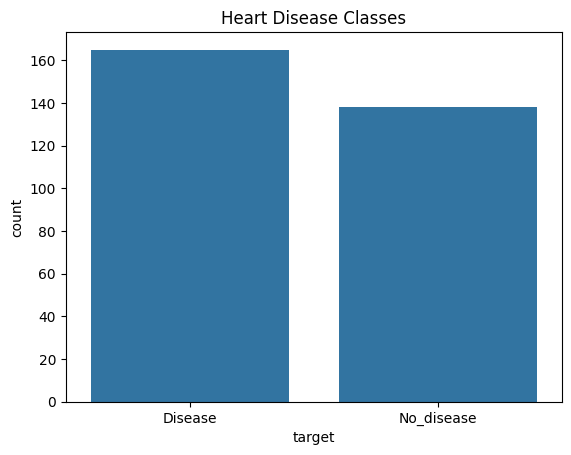

In [8]:
sns.barplot(data['target'].value_counts())
plt.title('Heart Disease Classes')
plt.show()

Text(0.5, 1.0, 'Heart Disease Classes')

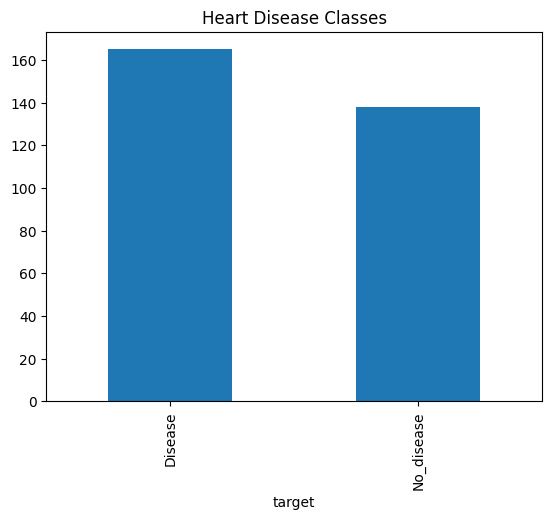

In [9]:
## we can plot the same barplots usng the pandas inbuilt plotting functions.
data['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

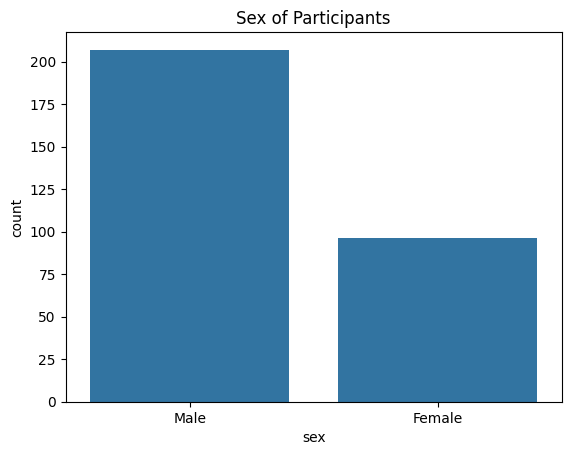

In [11]:
#  Now plot a barplot indicating the the sex of the participants involved in the study, use whatever method of ploting comfortable for you
# to do

# Plotting a barplot for the sex of participants
sns.barplot(data['sex'].value_counts())
plt.title('Sex of Participants')
plt.show()


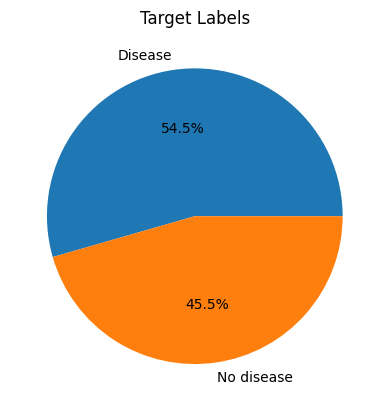

In [12]:
## pie charts can also be used to show the same infomation in a different manner
plt.pie(data['target'].value_counts(), labels=["Disease", "No disease"], autopct='%1.1f%%')
plt.title('Target Labels')
plt.show()

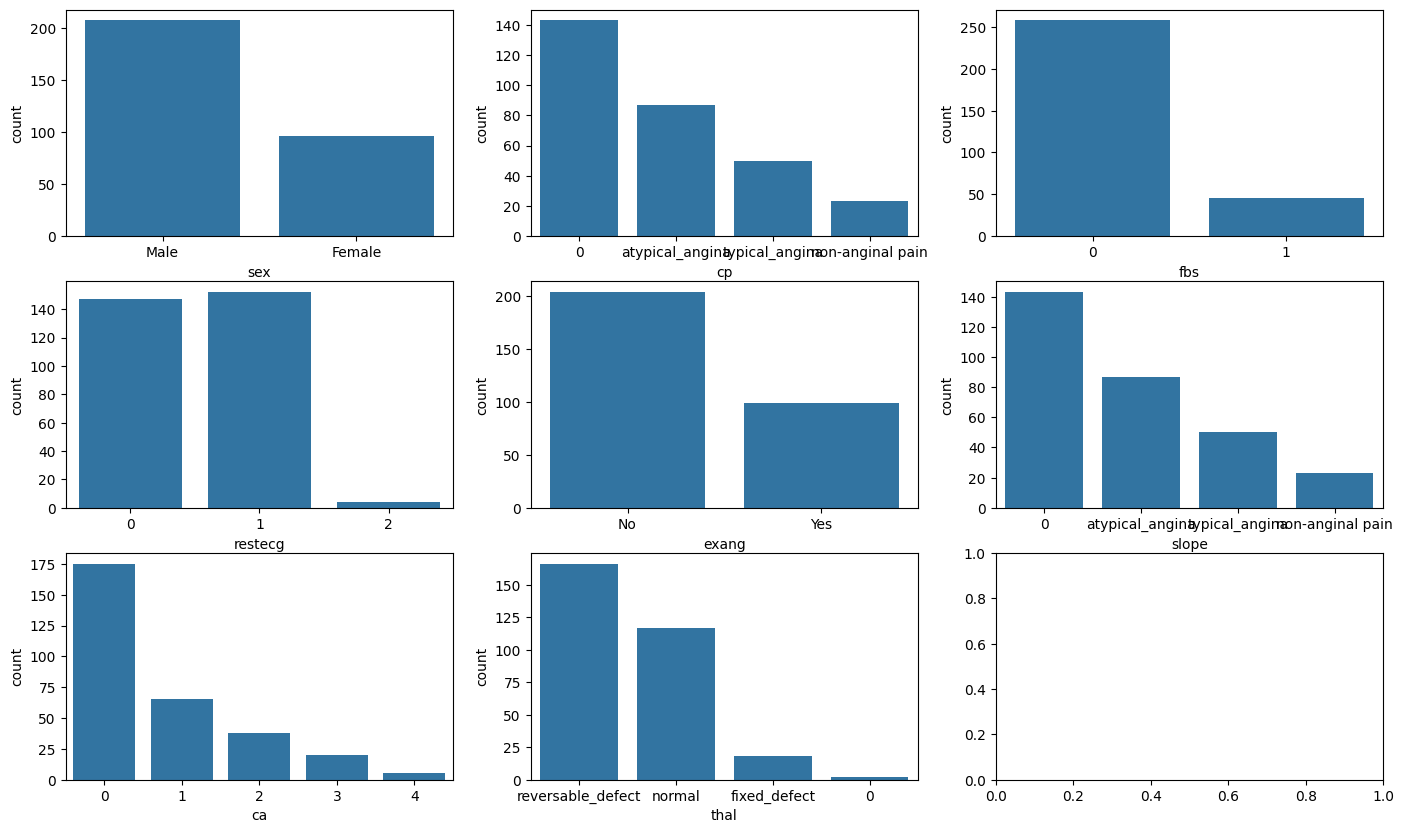

In [13]:
# next we will plot the counts of all the non-continous features present in the dataset.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.barplot(data[feature].value_counts(), ax=ax)

Text(0.5, 1.0, 'Disease classes according to Chest Pain')

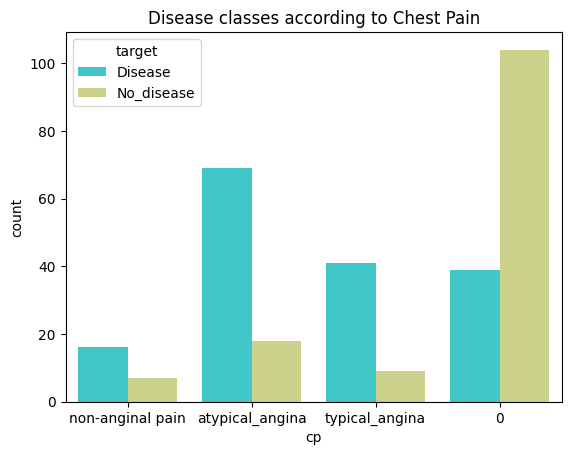

In [14]:
##  now lets play with 2 vaiables in dataset. Lets see if chest pain translates to the presence of desease in most cases...
sns.countplot(x='cp', hue='target', data=data, palette='rainbow').set_title('Disease classes according to Chest Pain')

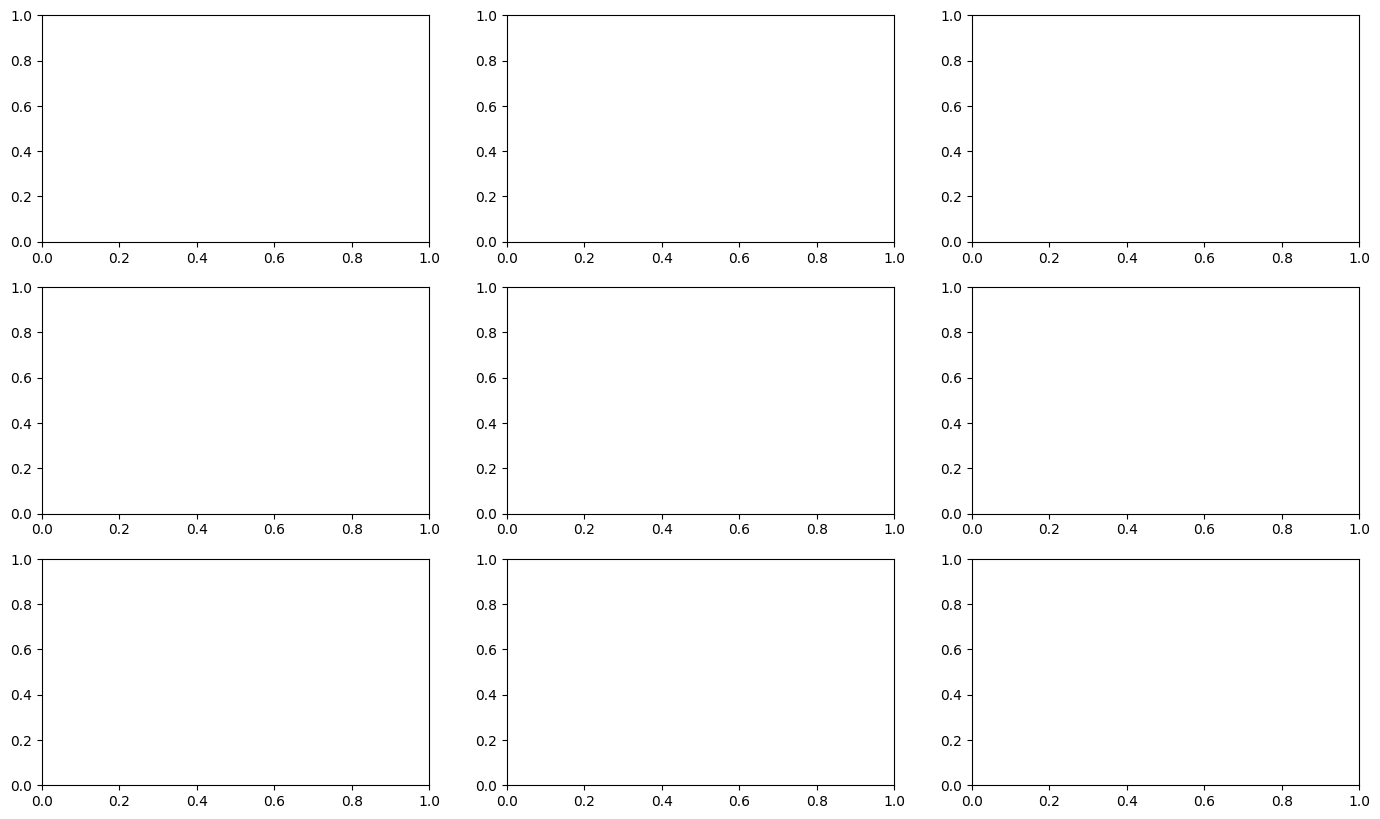

In [15]:
# now lets visualise count of all vairables w.r.t the presence of disease togather:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    ## to do


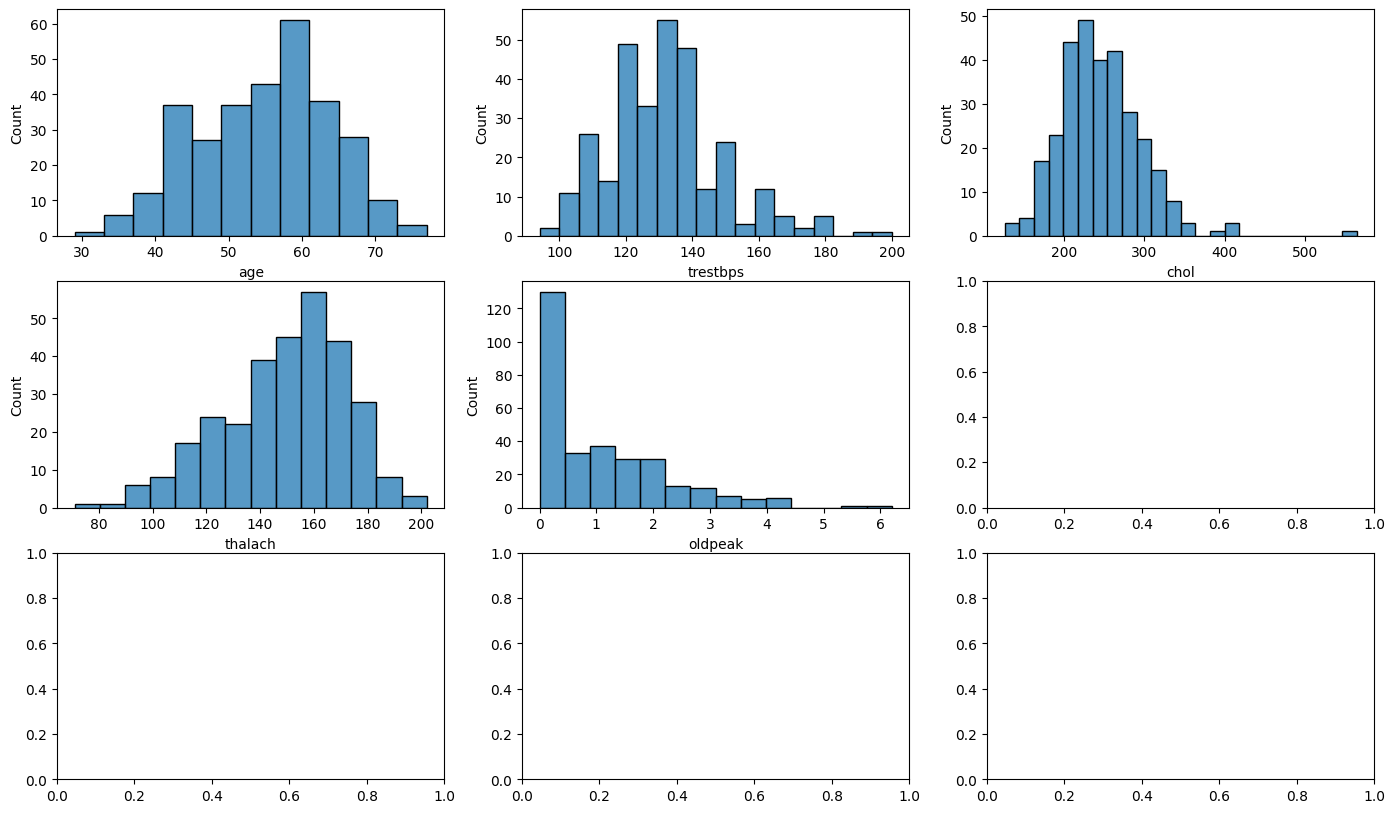

In [18]:
# Visualising the distribution of the continous variables

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cont_feat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for idx, feature in enumerate(cont_feat):
    ax = axes[int(idx/3), idx%3]
    sns.histplot(data[feature], ax=ax)


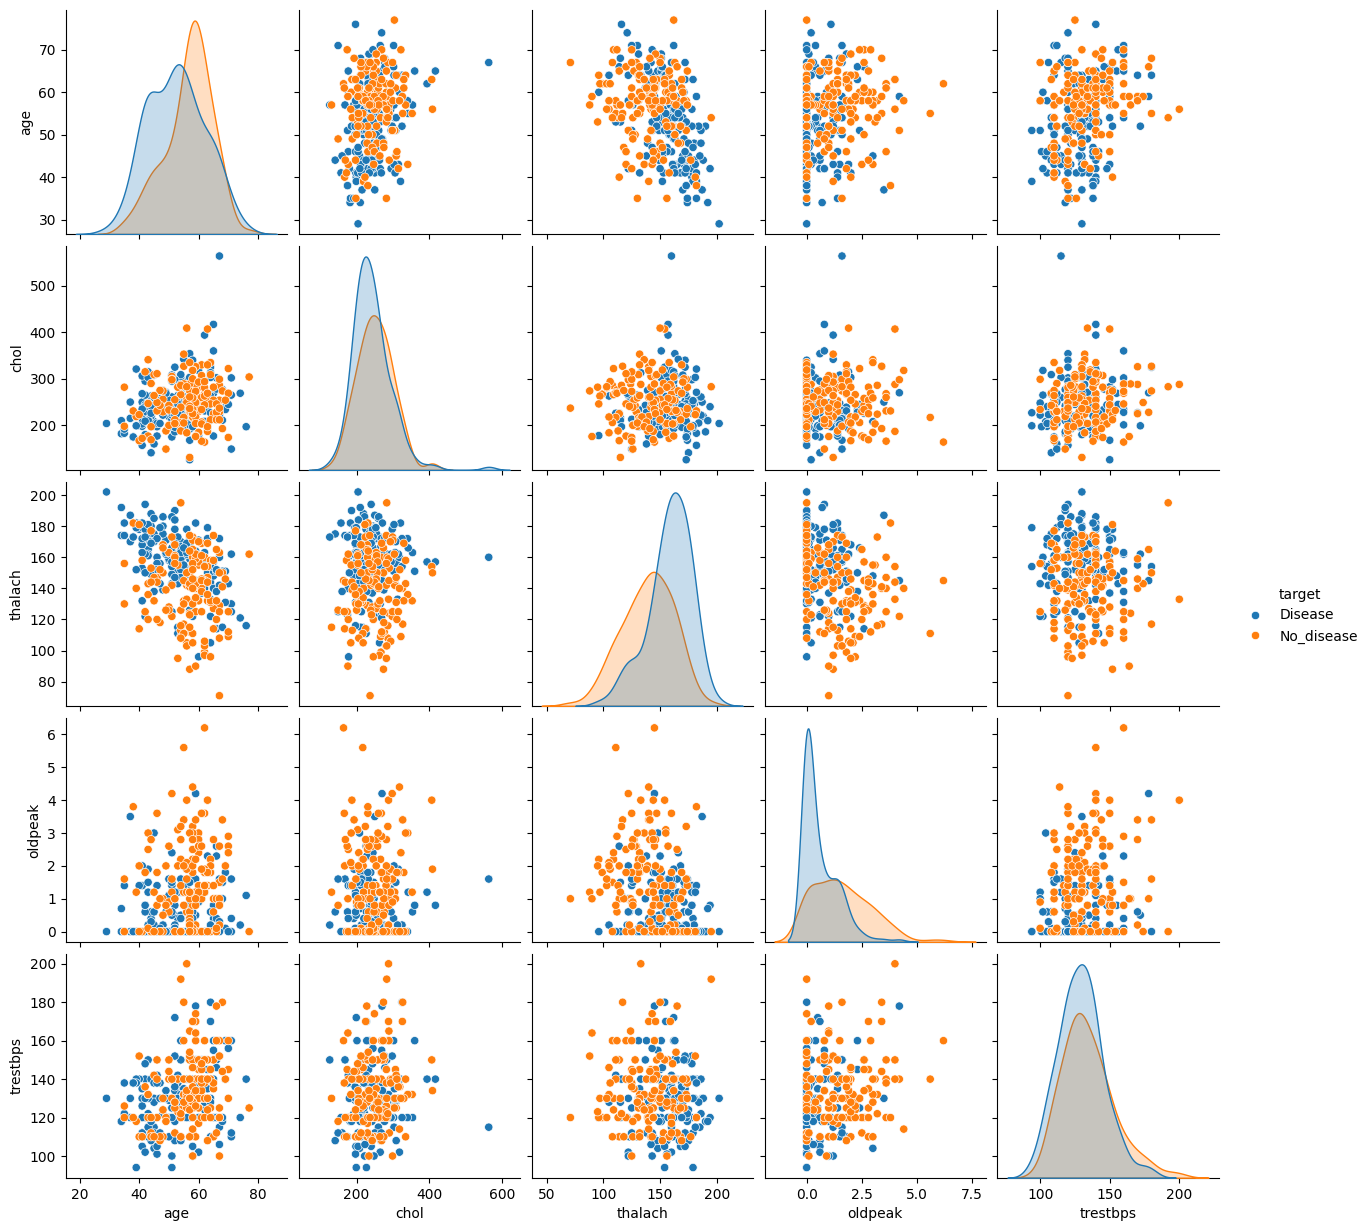

In [17]:
## pair plots can automoaticaly be used to viwe the pairwise relationship between all the  feature that we selected
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']
sns.pairplot(data[continous_features + ['target']], hue='target')

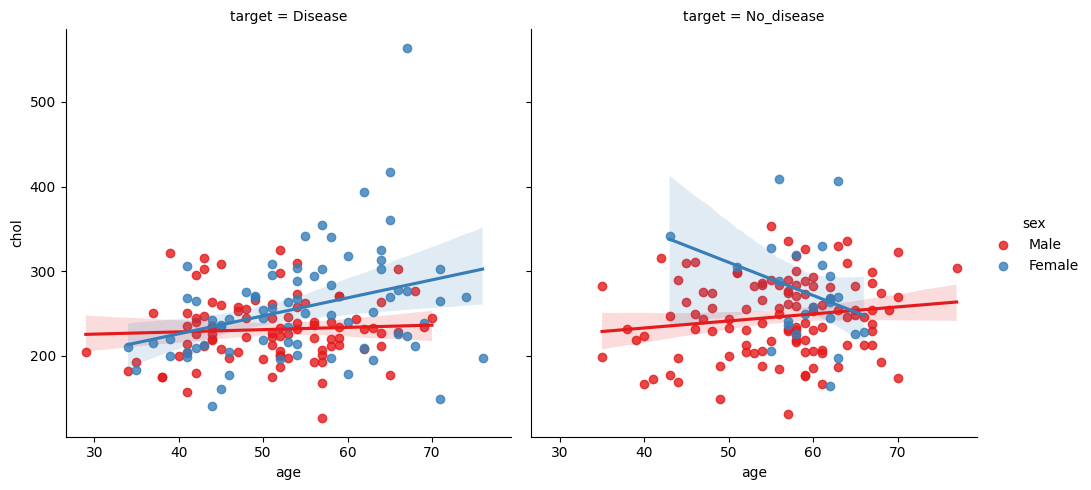

In [19]:
# Now lets try to understand the relationship between age and chol in each of the target based on sex.
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           palette="Set1",
           data=data)
plt.show()

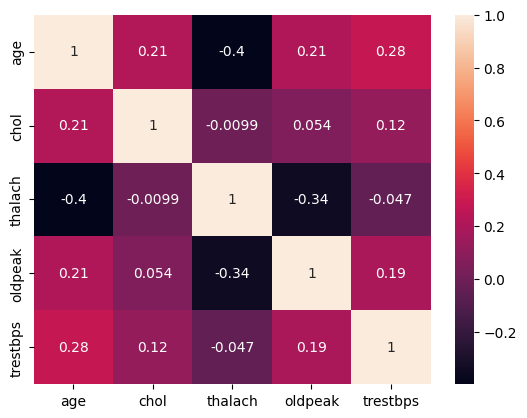

In [20]:
numeric_data = data[continous_features]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)


plt.show()

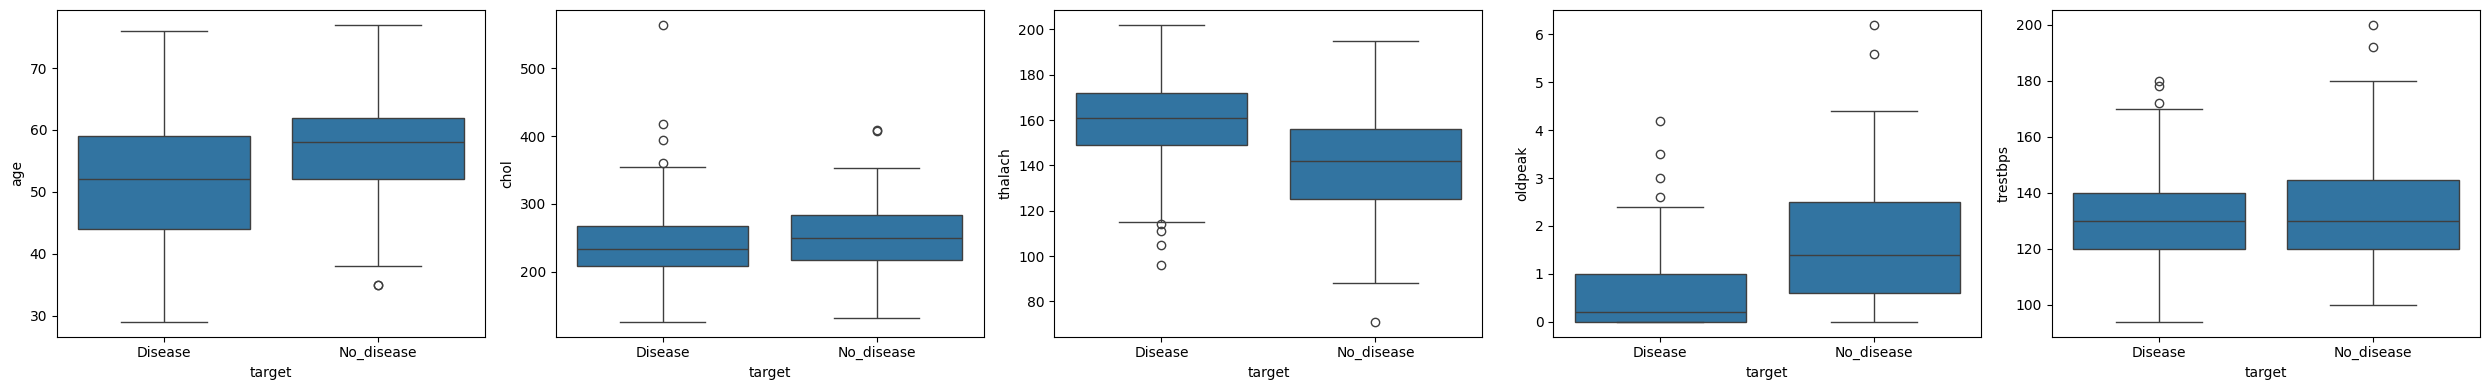

In [21]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data, ax=axes[idx])
plt.tight_layout()
plt.show()

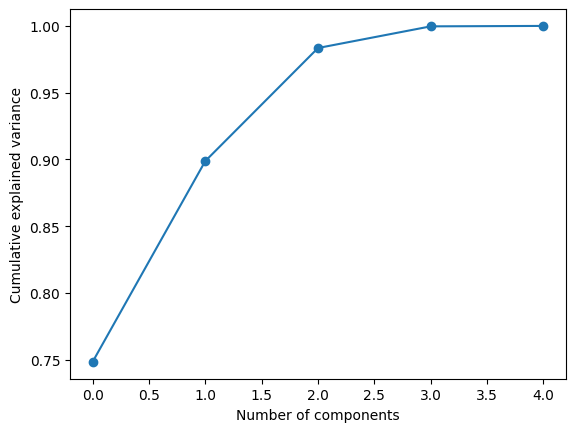

In [22]:
# prompt: plot the cumulative variace of pca for all the possibel pronviopal components
## to do
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(numeric_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


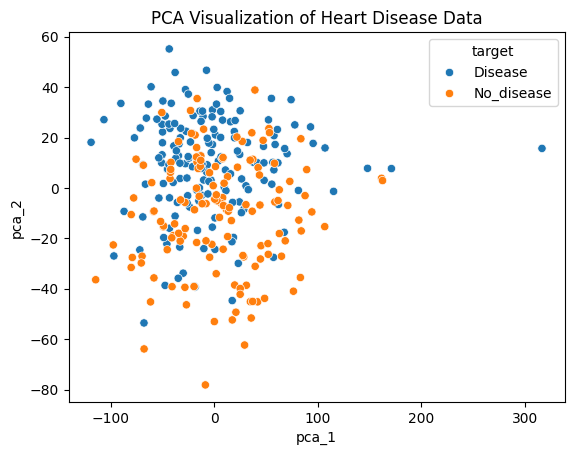

In [23]:
pca = PCA(n_components=2)
pca.fit(numeric_data)
pca_data = pca.transform(numeric_data)

# Create a DataFrame with the principal components and target labels
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "target": data["target"]
})

# Visualize the PCA results with a scatter plot
sns.scatterplot(x="pca_1", y="pca_2", hue="target", data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()


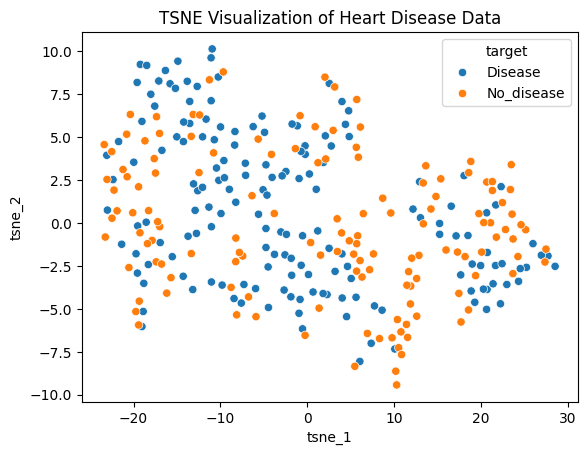

In [24]:
from sklearn.manifold import TSNE

# Initialize and fit the TSNE model
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(numeric_data)

# Create a DataFrame with the TSNE components and target labels
tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "target": data["target"]
})

# Visualize the TSNE results with a scatter plot
sns.scatterplot(x="tsne_1", y="tsne_2", hue="target", data=tsne_df)
plt.title("TSNE Visualization of Heart Disease Data")
plt.show()


Based on the plots above, answer the following questions:    
1. What is the percentage of Samples with Disease?    
2. what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?    
3. Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots?    
4. What is the optimal number of principal components in our case?    
5. what are the continous features with the highest correation with each other?

Here’s a breakdown of how to address these questions:

1. **Percentage of Samples with Disease:**
   - You can calculate this by dividing the number of samples with the disease by the total number of samples and then multiplying by 100.
   - Formula:  
     \[
     \text{Percentage} = \left( \frac{\text{Samples with Disease}}{\text{Total Samples}} \right) \times 100
     \]

2. **3 Continuous Features Showing Significant Statistical Difference in Distribution with Respect to the Presence/Absence of Disease:**
   - You would typically use statistical tests like the **t-test** or **Mann-Whitney U test** (depending on the data distribution) to determine whether the distributions of continuous features differ significantly between the diseased and non-diseased groups.
   - Sort the p-values to identify the top three features with the smallest p-values, indicating the strongest differences.

3. **Clear Separation in PCA and t-SNE Plots:**
   - Perform **Principal Component Analysis (PCA)** and **t-Distributed Stochastic Neighbor Embedding (t-SNE)** on the dataset to reduce dimensionality.
   - Plot the results and observe whether the samples group distinctly based on disease presence or absence. A clear separation indicates the features' ability to distinguish between the two groups.

4. **Optimal Number of Principal Components:**
   - The optimal number of principal components can be determined by examining the **explained variance**.
   - Use a **scree plot** to observe the cumulative variance explained by each component. Select the number of components that explain most of the variance (e.g., 90-95% of the total variance).

5. **Continuous Features with the Highest Correlation with Each Other:**
   - Calculate the **correlation matrix** for the continuous features using Pearson’s correlation.
   - Identify the feature pairs with the highest correlation values (closer to +1 or -1 indicates stronger correlations).
   - This can be visualized using a **heatmap** to quickly identify features with high correlations.

Each of these questions can be addressed with Python libraries like **Pandas**, **Scikit-learn**, **Matplotlib**, **Seaborn**, and **SciPy** for calculations and plotting. Let me know if you'd like code or further elaboration on these steps!

Now lets move on to do the same analysis on the starbucks nutrition dataset. this dataset contains the nutrition information of starbucks drinks.

In [25]:
upload2 = files.upload()

Saving star_nutri_expanded.csv to star_nutri_expanded.csv


In [26]:
data = pd.read_csv("star_nutri_expanded.csv")

In [27]:
data.head()

Beverage_category       Beverage      Beverage_prep  Calories  \
0                   Coffee  Brewed Coffee              Short         3   
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   

  Total Fat (g)  Trans Fat (g)  Saturated Fat (g)  Sodium (mg)  \
0           0.1            0.0                0.0            0   
1           0.1            0.0                0.0            0   
2           0.1            0.0                0.0            0   
3           0.1            0.0                0.0            0   
4           0.1            0.1                0.0            5   

   Total Carbohydrates (g)  Cholesterol (mg)  Dietary Fibre (g)  Sugars (g)  \
0                        5                 0                  0           0   
1                       10                 0                  0           0   
2                       10                 0                  0           0   
3                       10                 0                  0           0   
4                       75                10                  0           9   

   Protein (g) Vitamin A (% DV) Vitamin C (% DV) Calcium (% DV) Iron (% DV)  \
0          0.3               0%               0%             0%          0%   
1          0.5               0%               0%             0%          0%   
2          1.0               0%               0%             0%          0%   
3          1.0               0%               0%             2%          0%   
4          6.0              10%               0%            20%          0%   

  Caffeine (mg)  
0           175  
1           260  
2           330  
3           410  
4            75

cleaning and filling the missing values in the data

In [28]:
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)
data['Caffeine (mg)'] = data['Caffeine (mg)'].astype(np.float64)
data['Caffeine (mg)'] = data['Caffeine (mg)'].fillna(data['Caffeine (mg)'].mean())

In [29]:
data['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [30]:
data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '3.2')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [32]:
# Extract columns with int and float types
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Print the numeric columns
print(numeric_columns)


Index(['Calories', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Caffeine (mg)'],
      dtype='object')


We will be analysing the dataset using the fact that weather the drink comes under the category tea or not

In [33]:
data['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [34]:
data['Tea'] = data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)
data = data.drop('Beverage_category', axis=1)

In [35]:
##  one hot encoding of categorical features in data
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [36]:
data = onehot_encode(
    data,
    columns=['Beverage', 'Beverage_prep'],
    prefixes=['bev', 'bevp']
)

In [37]:

data = data.replace({True: 1, False: 0})


In [38]:
data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))

<ipython-input-38-4d863302f14a>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))


In [39]:
data.head()

Calories  Total Fat (g)  Trans Fat (g)  Saturated Fat (g)  Sodium (mg)  \
0       3.0            0.1            0.0                0.0          0.0   
1       4.0            0.1            0.0                0.0          0.0   
2       5.0            0.1            0.0                0.0          0.0   
3       5.0            0.1            0.0                0.0          0.0   
4      70.0            0.1            0.1                0.0          5.0   

   Total Carbohydrates (g)  Cholesterol (mg)  Dietary Fibre (g)  Sugars (g)  \
0                      5.0               0.0                0.0         0.0   
1                     10.0               0.0                0.0         0.0   
2                     10.0               0.0                0.0         0.0   
3                     10.0               0.0                0.0         0.0   
4                     75.0              10.0                0.0         9.0   

   Protein (g)  ...  bevp_Grande Nonfat Milk  bevp_Short  \
0          0.3  ...                      0.0         1.0   
1          0.5  ...                      0.0         0.0   
2          1.0  ...                      0.0         0.0   
3          1.0  ...                      0.0         0.0   
4          6.0  ...                      0.0         0.0   

   bevp_Short Nonfat Milk  bevp_Solo  bevp_Soymilk  bevp_Tall  \
0                     0.0        0.0           0.0        0.0   
1                     0.0        0.0           0.0        1.0   
2                     0.0        0.0           0.0        0.0   
3                     0.0        0.0           0.0        0.0   
4                     1.0        0.0           0.0        0.0   

   bevp_Tall Nonfat Milk  bevp_Venti  bevp_Venti Nonfat Milk  bevp_Whole Milk  
0                    0.0         0.0                     0.0              0.0  
1                    0.0         0.0                     0.0              0.0  
2                    0.0         0.0                     0.0              0.0  
3                    0.0         1.0                     0.0              0.0  
4                    0.0         0.0                     0.0              0.0  

[5 rows x 62 columns]

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 62 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Calories                                                 242 non-null    float64
 1   Total Fat (g)                                            242 non-null    float64
 2   Trans Fat (g)                                            242 non-null    float64
 3   Saturated Fat (g)                                        242 non-null    float64
 4   Sodium (mg)                                              242 non-null    float64
 5   Total Carbohydrates (g)                                  242 non-null    float64
 6   Cholesterol (mg)                                         242 non-null    float64
 7   Dietary Fibre (g)                                        242 non-null    float64
 8   Sugars (g)                    

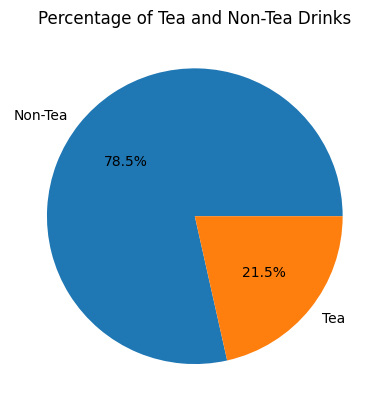

In [41]:
# to do
# # Create a pie chart of the 'Tea' column also write your observation form the plot

# Create a pie chart of the 'Tea' column
plt.pie(data['Tea'].value_counts(), labels=['Non-Tea', 'Tea'], autopct='%1.1f%%')
plt.title('Percentage of Tea and Non-Tea Drinks')
plt.show()

# Observation:
# Based on the pie chart, we can observe the proportion of drinks that are categorized as Tea versus those that are not.
# The chart visually represents the distribution of Tea and non-Tea items in the Starbucks dataset.


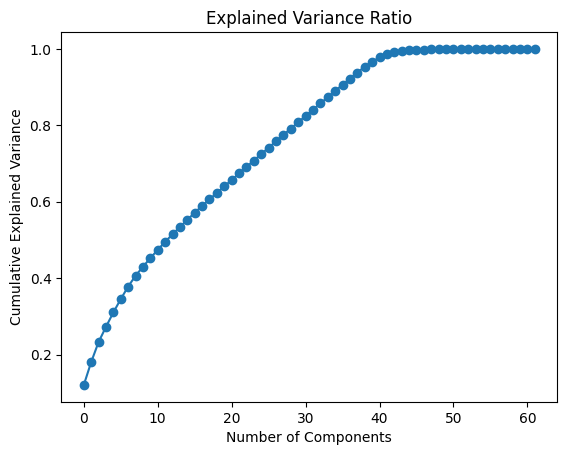

Optimal number of principal components: 39


In [43]:
 ## to do
# # perform pca on the data and plot the explained variace ratio, what is the optimal number of principal components in this case ?

from sklearn.preprocessing import StandardScaler

# Select numerical features for PCA
numerical_features = data.select_dtypes(include=np.number)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Plot the explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

# Determine the optimal number of components
explained_variance_threshold = 0.95  # Example: Keep components explaining 95% of variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= explained_variance_threshold) + 1
print(f"Optimal number of principal components: {n_components}")


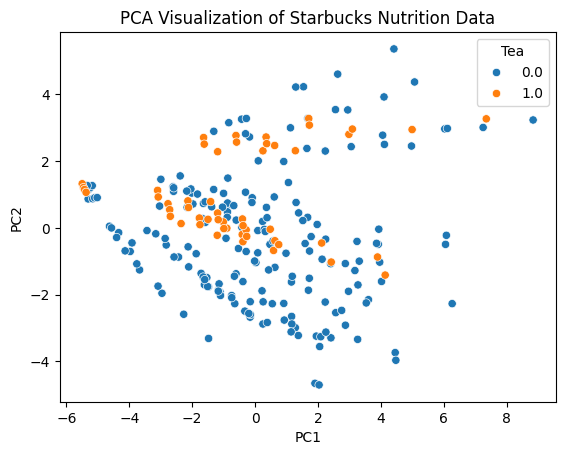

In [44]:
# prompt: ## to do
# # visualise the principal components, choose the number of principal components based on the above plot. What is you observation from the plot?

# Choose the number of principal components based on the explained variance plot
n_components_to_use = 10  # Example: Choose the number of components that explain most of the variance

# Apply PCA with the chosen number of components
pca = PCA(n_components=n_components_to_use)
pca.fit(scaled_data)
principal_components = pca.transform(scaled_data)

# Create a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components_to_use + 1)])

# Add the 'Tea' column for visualization
principal_df['Tea'] = data['Tea']

# Visualize the principal components with a scatter plot
sns.scatterplot(x='PC1', y='PC2', hue='Tea', data=principal_df)
plt.title('PCA Visualization of Starbucks Nutrition Data')
plt.show()

# Observation:
# - The scatter plot shows how the data points are distributed based on the first two principal components.
# - The color indicates whether a drink is a tea drink or not.
# - If there's a clear separation between tea and non-tea drinks, it suggests that these components capture some of the key variations related to the "Tea" category.
# - You can analyze the plot to see if tea drinks tend to cluster together in a particular area of the plot.
# - You can repeat this visualization using different pairs of principal components to get a better understanding of the data structure.


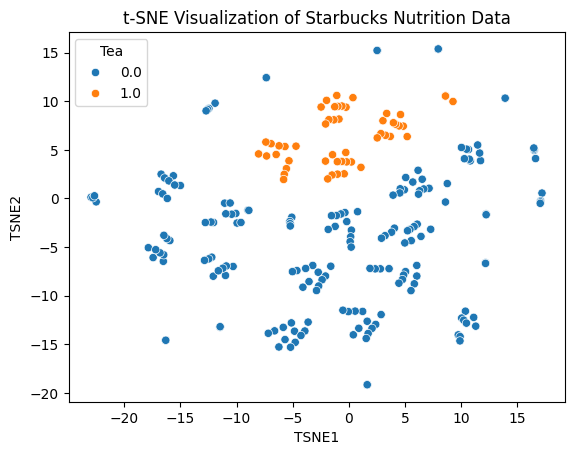

In [45]:
# to do
# # plot the first 2 components of tsne, whats you observation from the plot?

from sklearn.manifold import TSNE

# Select numerical features for t-SNE
numerical_features = data.select_dtypes(include=np.number)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

# Perform t-SNE
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(scaled_data)

# Create a DataFrame for the t-SNE components
tsne_df = pd.DataFrame(data=tsne_data, columns=['TSNE1', 'TSNE2'])

# Add the 'Tea' column for visualization
tsne_df['Tea'] = data['Tea']

# Visualize the t-SNE components with a scatter plot
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Tea', data=tsne_df)
plt.title('t-SNE Visualization of Starbucks Nutrition Data')
plt.show()

# Observation:
# The t-SNE plot shows the data points in a 2D space, where similar data points are closer together.
# The color represents whether a drink is a tea drink or not.
# If there's a clear separation between tea and non-tea drinks in the plot, it suggests that t-SNE was able to capture meaningful patterns related to the "Tea" category.
# You can analyze the plot to see if tea drinks tend to cluster together in a particular area of the plot.
# You can interpret the plot in terms of how well the t-SNE algorithm grouped the data based on the 'Tea' category.


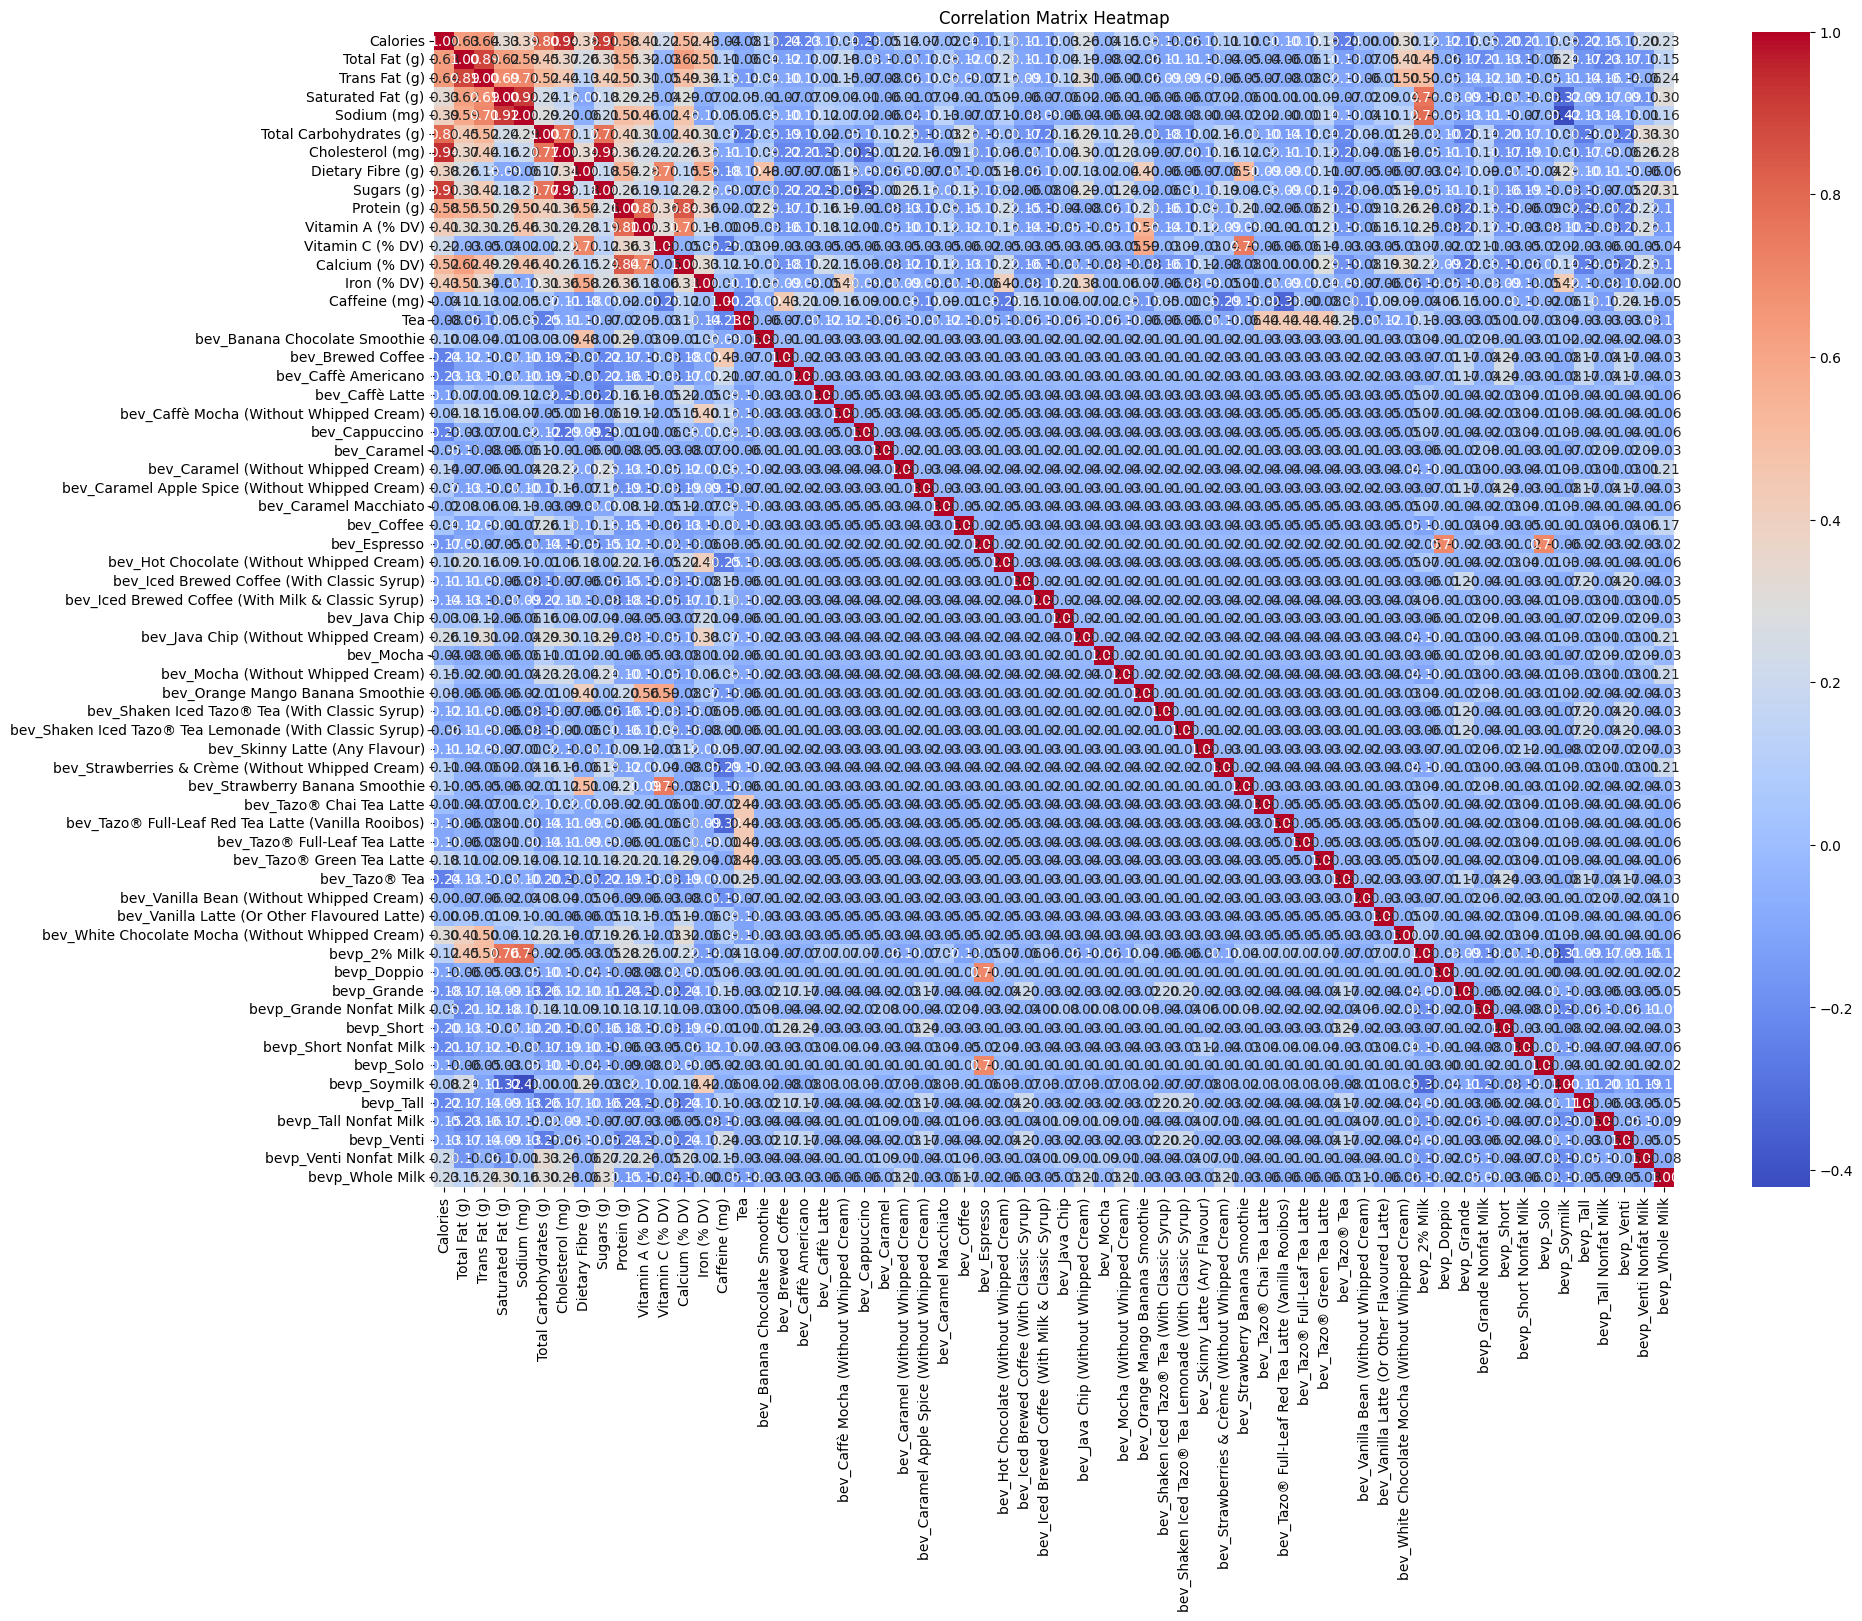

In [46]:
# to do
# # create a correlation matrix and plot the heatmap, whats your observation from the heatmap ?

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Observation:
# The heatmap displays the correlation coefficients between all pairs of features in the dataset.
# Darker red colors represent strong positive correlations, while darker blue colors indicate strong negative correlations.
# Lighter colors (close to white) suggest weak or no correlation between features.
# By examining the heatmap, you can identify groups of features that are highly correlated with each other and those that are relatively independent.
# This can help you understand the relationships between different variables in your data and potentially identify redundant or influential features for your analysis.


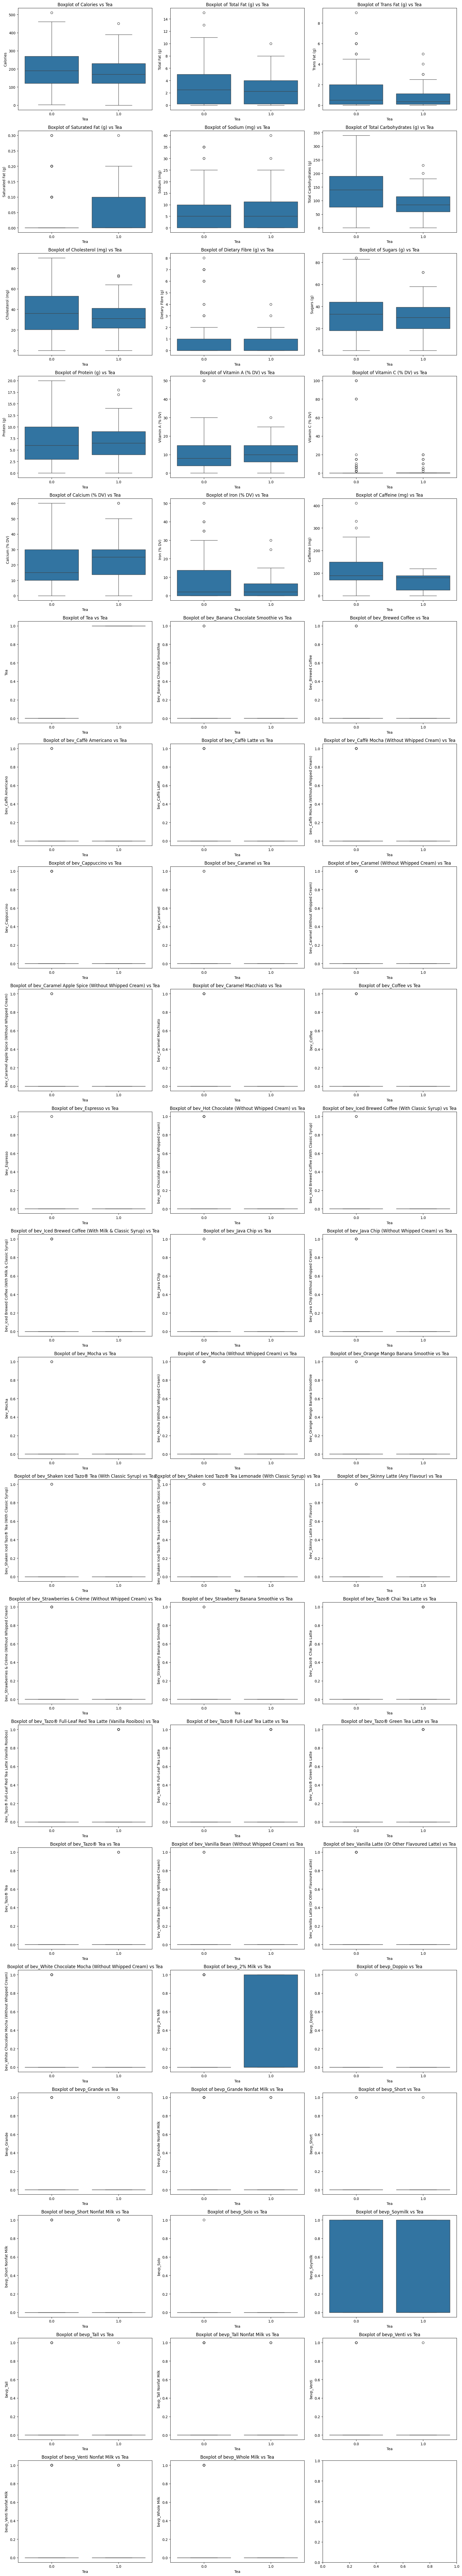

In [47]:
# to do
# # make a boxplot of all the numeric columns of the dataset. Which column/columns can be the most potential indicator weather its a tea or a non tea drink?

# Create boxplots for all numeric columns with respect to 'Tea'
numerical_features = data.select_dtypes(include=np.number).columns
fig, axes = plt.subplots(nrows=len(numerical_features) // 3 + 1, ncols=3, figsize=(18, 100))  # Adjust figure size as needed

for i, feature in enumerate(numerical_features):
  row_index = i // 3
  col_index = i % 3
  sns.boxplot(x='Tea', y=feature, data=data, ax=axes[row_index, col_index])
  axes[row_index, col_index].set_title(f'Boxplot of {feature} vs Tea')

plt.tight_layout()
plt.show()


# Potential indicators based on the box plots
# Look for features where the box plots for 'Tea' (1) and 'Non-Tea' (0) are significantly different.
# Features with a larger difference between the median or the interquartile ranges suggest a stronger potential for indicating whether it's a tea drink.
# For example:
# - Caffeine: Tea drinks may have higher caffeine levels.
# - Calories: Tea drinks may have different calorie distributions compared to non-tea drinks.
# - Protein: Tea drinks may have lower protein content.
# - Total Fat: Tea drinks typically have lower fat content.

# Based on the box plots, you can identify the features that show the biggest differences between 'Tea' and 'Non-Tea' drinks.
# These features are potential indicators of whether a drink is a tea drink or not.


To enhance the clarity and professionalism of the provided text, consider the following refined version: In the process of conducting a preliminary Exploratory Data Analysis (EDA), we have utilized various techniques to gain insights into the datasets under consideration. It's important to note that our analysis extends beyond the initial visualizations, embracing a multitude of methods to thoroughly understand the data.
Among the array of tools available for EDA, one particularly easy solution is the use of the pandas profiling library. This tool significantly simplifies the process of exploring the fundamental distribution of data within a dataset. By generating detailed profile reports, pandas profiling provides a comprehensive overview of the dataset's characteristics, including but not limited to, the distribution of variables, presence of missing values, and potential correlations between variables.
Furthermore, we are utilizing Google Colab notebooks, the integration of AI tools offers an additional avenue for data visualization and analysis. These tools can automatically generate insightful plots and statistics, further enriching the data exploration process.

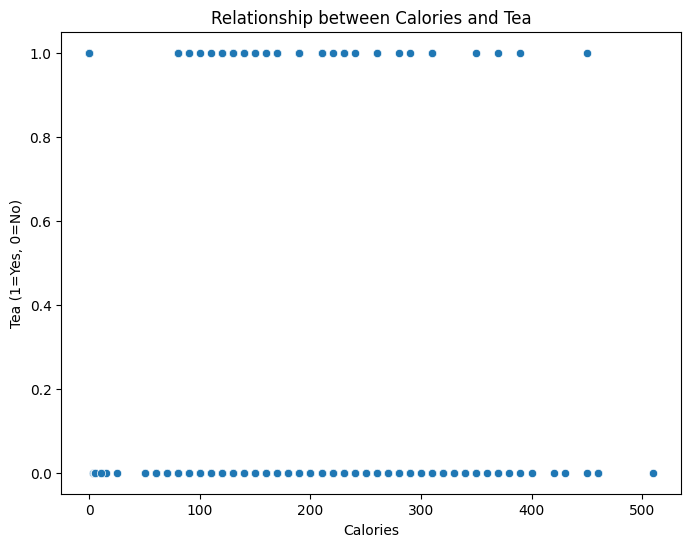

Correlation between Calories and Tea: -0.08441784427664994


In [48]:
# another

# Assuming 'data' is your DataFrame from the previous code
# and you want to see if there's a correlation between 'Calories' and 'Tea'

# Create a scatter plot to visualize the relationship between 'Calories' and 'Tea'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Calories', y='Tea', data=data)
plt.title('Relationship between Calories and Tea')
plt.xlabel('Calories')
plt.ylabel('Tea (1=Yes, 0=No)')
plt.show()

# Calculate the correlation coefficient between 'Calories' and 'Tea'
correlation = data['Calories'].corr(data['Tea'])
print(f"Correlation between Calories and Tea: {correlation}")

# You can repeat this process for other numerical features to see if there's a
# correlation with the 'Tea' variable.

